# 🕦 11:30 AM – 1:00 PM  
## 💡 Session 2: Motivation for Quantum Computing

---

### 🎯 **Learning Objectives**
- Understand the limitations of **classical bits** and the motivation for **quantum bits (qubits)**.  
- Define a **qubit** as a two-level quantum system.  
- Visualize qubit states on the **Bloch sphere**.  
- Learn why quantum computing offers fundamentally new possibilities.

---

### ⚙️ **From Classical Bits to Quantum Qubits**

| Concept | Classical Bit | Quantum Qubit |
|----------|----------------|----------------|
| Possible States | `0` or `1` | \( |\psi\rangle = \alpha|0\rangle + \beta|1\rangle \) |
| Nature | Deterministic | Probabilistic / Superposed |
| Representation | Binary number | Vector in complex Hilbert space |
| Measurement | Direct readout | Collapses superposition |

---

### 🔬 **The Qubit**

A qubit is a **two-level quantum system**, mathematically expressed as:

\[
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle
\]
where  
\[
|\alpha|^2 + |\beta|^2 = 1
\]

- \( |0\rangle \) and \( |1\rangle \): basis states  
- \( \alpha, \beta \): complex probability amplitudes  

---

### 🌀 **The Bloch Sphere Representation**

Every pure qubit state can be represented as a point on the surface of a sphere:

\[
|\psi\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle + e^{i\phi}\sin\left(\frac{\theta}{2}\right)|1\rangle
\]

- \( \theta \): polar angle → determines the probability distribution  
- \( \phi \): azimuthal angle → represents the relative phase  

---

### 💻 **Hands-On Demo (Python)**

```python
import numpy as np
from scipy.linalg import expm
from qutip import Bloch, Qobj, sigmax, sigmay, sigmaz

# --------------------------------------
# Pauli matrices
# --------------------------------------
sx = np.array([[0, 1], [1, 0]], dtype=complex)
sy = np.array([[0, -1j], [1j, 0]], dtype=complex)
sz = np.array([[1, 0], [0, -1]], dtype=complex)

# --------------------------------------
# Input α, β, γ
# --------------------------------------
alpha = float(input("Enter α: "))
beta  = float(input("Enter β: "))
gamma = float(input("Enter γ: "))

# --------------------------------------
# Construct H and compute U = exp(iH)
# --------------------------------------
H = alpha * sx + beta * sy + gamma * sz
U = expm(1j * H)

print("\nU = exp[i(α σx + β σy + γ σz)] =\n", np.round(U, 3))

# --------------------------------------
# Initial and final states
# --------------------------------------
psi0 = np.array([[1], [0]], dtype=complex)  # |0⟩
psi1 = U @ psi0

# --------------------------------------
# Intermediate evolution: e^{iHt} |0⟩ for t ∈ [0,1]
# --------------------------------------
steps = 40
t_vals = np.linspace(0, 1, steps)

# Function to convert state to Bloch vector (x, y, z)
def bloch_coords(psi):
    psi = Qobj(psi)
    x = np.real((psi.dag() * sigmax() * psi))
    y = np.real((psi.dag() * sigmay() * psi))
    z = np.real((psi.dag() * sigmaz() * psi))
    return np.array([x, y, z])

# Collect Bloch coordinates of the intermediate states
bloch_path = np.zeros((3, steps))
for i, t in enumerate(t_vals):
    Ut = expm(1j * H * t)
    psi_t = Ut @ psi0
    bloch_path[:, i] = bloch_coords(psi_t)

# --------------------------------------
# Bloch sphere visualization
# --------------------------------------
b = Bloch()
b.vector_color = ['orange', 'purple']
b.point_color = ['gray']
b.point_marker = ['o']
b.point_size = [30]

# Initial and final vectors
b.add_states(Qobj(psi0), kind='vector')
b.add_states(Qobj(psi1), kind='vector')

# Add the smooth path (3×N array)
b.add_points(bloch_path)

# Axis labels and style
b.add_annotation([-1.2, 0, 0], r"$X$")
b.add_annotation([0, -1.2, 0], r"$Y$")
b.add_annotation([0, 0, 2.2], r"$Z$")
b.title = "Bloch Sphere: Evolution under exp[i(ασx + βσy + γσz)]"

# Display
b.show()


In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 113.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=90271a2ed3dc32e3c7aba88f3b9bae9ba860a1afe8aed2f523262656fb0197b9
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 62.5 MB/s eta 0:00:00


In [ ]:
import numpy as np

In this example, we create a quantum circuit with two qubits. We first apply a Hadamard gate to the first qubit to put it into a superposition state. Then, we use a CNOT gate to entangle the first qubit with the second qubit. Measuring the qubits will show correlated results, demonstrating their entangled state.

In [ ]:
# Represent |0> and |1>
ket0 = np.array([1, 0])
ket1 = np.array([0, 1])

# Hadamard gate
H = (1/np.sqrt(2)) * np.array([[1, 1],
                                [1, -1]])

# Apply to |0> to create superposition
psi = H @ ket0
print("State:", psi)
print("P(|0>) =", np.abs(psi[0])**2)
print("P(|1>) =", np.abs(psi[1])**2)


State: [0.70710678 0.70710678]
P(|0>) = 0.4999999999999999
P(|1>) = 0.4999999999999999


Enter spherical coordinates of the Bloch vector:


θ (in degrees, 0° = north pole):  0
φ (in degrees, from X axis):  0
|r| (0 to 1, 1 = pure state):  1



🧭 Bloch vector components:
   x = 0.000, y = 0.000, z = 1.000

🧮 Density matrix in Bloch form:
ρ = ½ ( I + r⃗ · σ⃗ )
  = ½ [ I + (0.000)σx + (0.000)σy + (1.000)σz ]

📘 Numerical density matrix (ρ):
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


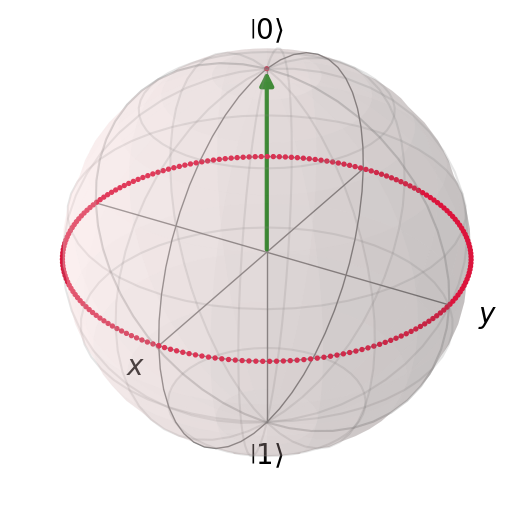


✅ Bloch sphere and density matrix displayed successfully!


In [26]:
import numpy as np
from qutip import Bloch, Qobj

# --------------------------------------------
# User input
# --------------------------------------------
print("Enter spherical coordinates of the Bloch vector:")
theta = float(input("θ (in degrees, 0° = north pole): "))
phi   = float(input("φ (in degrees, from X axis): "))
r     = float(input("|r| (0 to 1, 1 = pure state): "))

# Convert to radians
theta_rad = np.deg2rad(theta)
phi_rad   = np.deg2rad(phi)

# --------------------------------------------
# Compute Bloch vector components
# --------------------------------------------
x = r * np.sin(theta_rad) * np.cos(phi_rad)
y = r * np.sin(theta_rad) * np.sin(phi_rad)
z = r * np.cos(theta_rad)

print(f"\n🧭 Bloch vector components:")
print(f"   x = {x:.3f}, y = {y:.3f}, z = {z:.3f}")

# --------------------------------------------
# Build the density matrix in the Bloch form
# ρ = (1/2)(I + r·σ)
# --------------------------------------------
I = np.eye(2, dtype=complex)
sx = np.array([[0, 1], [1, 0]], dtype=complex)
sy = np.array([[0, -1j], [1j, 0]], dtype=complex)
sz = np.array([[1, 0], [0, -1]], dtype=complex)

rho = 0.5 * (I + x * sx + y * sy + z * sz)
rho_qobj = Qobj(rho)

# --------------------------------------------
# Display the symbolic form
# --------------------------------------------
print("\n🧮 Density matrix in Bloch form:")
print("ρ = ½ ( I + r⃗ · σ⃗ )")
print(f"  = ½ [ I + ({x:.3f})σx + ({y:.3f})σy + ({z:.3f})σz ]")

# --------------------------------------------
# Display numeric matrix
# --------------------------------------------
np.set_printoptions(precision=3, suppress=True)
print("\n📘 Numerical density matrix (ρ):")
print(rho)

# --------------------------------------------
# Create the Bloch sphere
# --------------------------------------------
b = Bloch()
b.title = fr"Bloch Sphere (θ={theta:.1f}°, φ={phi:.1f}°)"

# Add the state vector and its tip
b.add_vectors([x, y, z])
b.add_points([[x], [y], [z]])

# Add equator ring (gray circle)
phi_circle = np.linspace(0, 2*np.pi, 200)
b.point_color = ['gray']
b.point_marker = ['.']
b.add_points([np.cos(phi_circle), np.sin(phi_circle), np.zeros_like(phi_circle)], meth='m')

# Reset main color
b.point_color = ['crimson']

# --------------------------------------------
# Show the Bloch sphere
# --------------------------------------------
# b.view = [-45, 60]
b.show()

print("\n✅ Bloch sphere and density matrix displayed successfully!")



=== Haar Random (Entangled) ===
State |ψ⟩: [-0.137-0.063j  0.039-0.444j -0.343-0.095j -0.752-0.295j]
Schmidt coefficients: [0.988 0.154]
Schmidt rank: 2

=== Random Separable ===
State |ψ⟩: [ 0.48 -0.53j   0.483-0.255j -0.14 -0.317j -0.018-0.265j]
Schmidt coefficients: [1. 0.]
Schmidt rank: 1


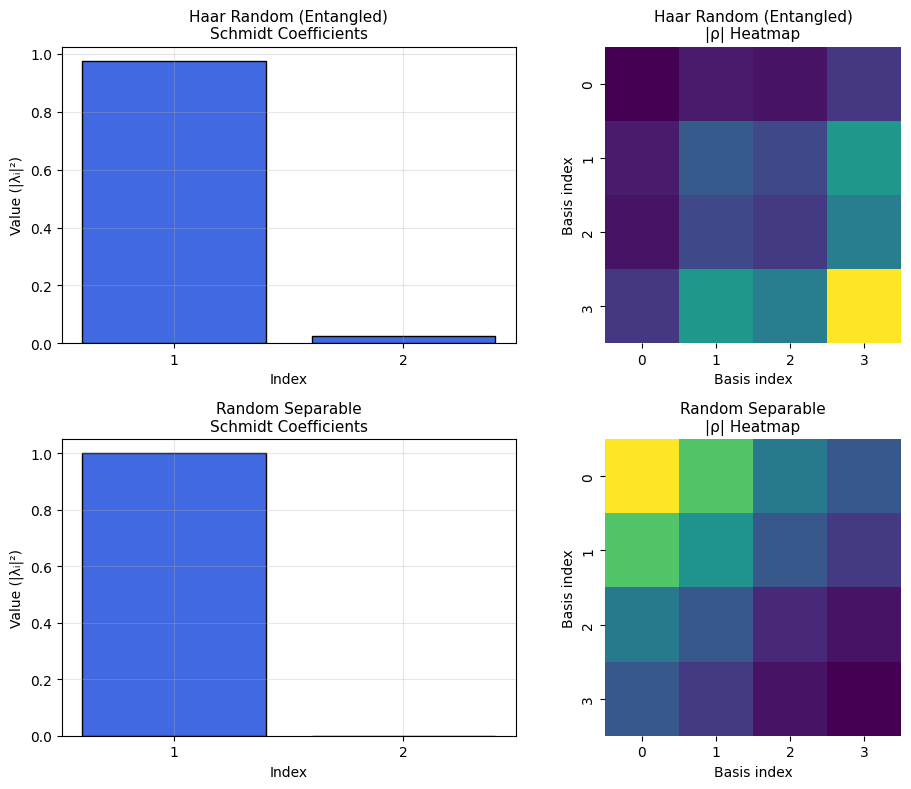

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import svd

# ----------------------------------------
# Generate Haar random 2-qubit state
# ----------------------------------------
def haar_random_state(num_qubits=2):
    dim = 2 ** num_qubits
    psi = (np.random.randn(dim) + 1j * np.random.randn(dim))
    psi /= np.linalg.norm(psi)
    return psi

# ----------------------------------------
# Generate a random separable (product) state
# ----------------------------------------
def separable_state():
    # Random single-qubit states
    psiA = (np.random.randn(2) + 1j * np.random.randn(2))
    psiB = (np.random.randn(2) + 1j * np.random.randn(2))
    psiA /= np.linalg.norm(psiA)
    psiB /= np.linalg.norm(psiB)
    # Tensor product
    psi = np.kron(psiA, psiB)
    return psi

# ----------------------------------------
# Schmidt decomposition for 2-qubit state
# ----------------------------------------
def schmidt_decomposition(psi):
    M = psi.reshape(2, 2)
    U, s, Vh = svd(M)
    schmidt_coeffs = s / np.linalg.norm(s)
    schmidt_rank = np.sum(schmidt_coeffs > 1e-12)
    return schmidt_coeffs, U, Vh, schmidt_rank

# ----------------------------------------
# Plotting helpers
# ----------------------------------------
def plot_schmidt_coeffs(schmidt_coeffs, title):
    plt.bar(range(1, len(schmidt_coeffs) + 1), schmidt_coeffs**2,
            color='royalblue', edgecolor='black')
    plt.title(title, fontsize=11)
    plt.xlabel("Index")
    plt.ylabel("Value (|λᵢ|²)")
    plt.xticks([1, 2])
    plt.grid(alpha=0.3)

def plot_density_matrix(psi, title):
    rho = np.outer(psi, np.conjugate(psi))
    sns.heatmap(np.abs(rho), cmap='viridis', cbar=False, square=True)
    plt.title(title, fontsize=11)
    plt.xlabel("Basis index")
    plt.ylabel("Basis index")

# ----------------------------------------
# Main: Generate and analyze both states
# ----------------------------------------
states = {
    "Haar Random (Entangled)": haar_random_state(2),
    "Random Separable": separable_state()
}

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(hspace=0.4)

for i, (title, psi) in enumerate(states.items()):
    schmidt_coeffs, U, Vh, rank = schmidt_decomposition(psi)

    # --- Print details ---
    print(f"\n=== {title} ===")
    print("State |ψ⟩:", np.round(psi, 3))
    print("Schmidt coefficients:", np.round(schmidt_coeffs, 4))
    print("Schmidt rank:", rank)

    # --- Plot Schmidt coefficients ---
    plt.sca(axes[i, 0])
    plot_schmidt_coeffs(schmidt_coeffs, f"{title}\nSchmidt Coefficients")

    # --- Plot density matrix ---
    plt.sca(axes[i, 1])
    plot_density_matrix(psi, f"{title}\n|ρ| Heatmap")

plt.tight_layout()
plt.show()


In [ ]:
print("\n=== Session 2: Motivation for Quantum Computing ===")

# Thinking in bits and qubits
bit0, bit1 = 0, 1
print(f"Classical bit states: {bit0}, {bit1}")


=== Session 2: Motivation for Quantum Computing ===
Classical bit states: 0, 1


In [ ]:

# Quantum bit (Qubit): |ψ> = α|0> + β|1>, with |α|² + |β|² = 1
alpha, beta = 1/np.sqrt(2), 1j/np.sqrt(2)
print(f"Quantum qubit state: |ψ> = {alpha}|0> + {beta}|1>")

Quantum qubit state: |ψ> = 0.7071067811865475|0> + 0.7071067811865475j|1>


In [ ]:
# Represent on Bloch sphere
theta = np.arccos(np.abs(alpha))
phi = np.angle(beta) - np.angle(alpha)
print(f"Bloch sphere coordinates: θ={2*theta:.2f}, φ={phi:.2f}")

Bloch sphere coordinates: θ=1.57, φ=1.57


In [ ]:
# Simple visual: probability of measuring |0> or |1>
p0 = np.abs(alpha)**2
p1 = np.abs(beta)**2
print(f"Measurement probabilities: P(|0>)={p0:.2f}, P(|1>)={p1:.2f}")

Measurement probabilities: P(|0>)=0.50, P(|1>)=0.50


## Deutsch Josza algorithm
Deutsch's algorithm is a pioneering quantum algorithm that solves a specific problem more efficiently than any classical algorithm. It determines if a single-bit "black box" function is "constant" (always returns the same output) or "balanced" (returns \(0\) for half the inputs and \(1\) for the other half) with just one quantum query, whereas a classical computer would need at least two queries. This was the first demonstration of a quantum advantage

<img src="img/Dwave.png" width="500" height="500"/>

In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Balanced oracle: flips output for half the inputs
def balanced_oracle(n_qubits):
    qc = QuantumCircuit(n_qubits + 1)
    for i in range(n_qubits):
        qc.cx(i, n_qubits)
    return qc

# Constant oracle: always returns 0 or 1
def constant_oracle(n_qubits, output=0):
    qc = QuantumCircuit(n_qubits + 1)
    if output == 1:
        qc.x(n_qubits)
    return qc

# ------------------------------------------
# Step 2: Deutsch–Jozsa Algorithm
# ------------------------------------------

def deutsch_jozsa(n_qubits, oracle):
    qc = QuantumCircuit(n_qubits + 1, n_qubits)

    # Initialize ancilla in |1⟩
    qc.x(n_qubits)
    qc.barrier()

    # Apply Hadamards
    qc.h(range(n_qubits + 1))
    qc.barrier()

    # Apply the oracle
    qc.compose(oracle, inplace=True)
    qc.barrier()

    # Apply Hadamard to first n qubits
    qc.h(range(n_qubits))

    # Measure
    qc.measure(range(n_qubits), range(n_qubits))

    return qc

# ------------------------------------------
# Step 3: Build & Simulate
# ------------------------------------------
n = 1  # number of input qubits
oracle = balanced_oracle(n)
# oracle = constant_oracle(n, output=0)

qc = deutsch_jozsa(n, oracle)
print(qc.draw())

# Use Qiskit Aer simulator
backend = Aer.get_backend('aer_simulator')
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

print("\nMeasurement results:", counts)
plot_histogram(counts)
plt.show()

# Interpretation:
# CONSTANT → result = '000...0'
# BALANCED → result ≠ '000...0'


           ░ ┌───┐ ░       ░ ┌───┐┌─┐
q_0: ──────░─┤ H ├─░───■───░─┤ H ├┤M├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐ ░ └───┘└╥┘
q_1: ┤ X ├─░─┤ H ├─░─┤ X ├─░───────╫─
     └───┘ ░ └───┘ ░ └───┘ ░       ║ 
c: 1/══════════════════════════════╩═
                                   0 

Measurement results: {'1': 1024}


In [ ]:
# Visualize the circuit
qc.draw('mpl')